In [1]:
from brian2 import *
import matplotlib.pyplot as plt
import numpy as np



INFO       Cache size for target "cython": 1249 MB.
You can call "clear_cache('cython')" to delete all files from the cache or manually delete files in the "C:\Users\golde\.cython\brian_extensions" directory. [brian2]


In [2]:
rpost1 = 30*Hz
rpost2 = 10*Hz
rpre = 60*Hz
N = 5000
T=3*second

rpost = TimedArray([rpost1,rpost2],dt=T/2)

post = PoissonGroup(N, rates='rpost(t)')
pre  = PoissonGroup(N, rates=rpre)

t1 = 10*ms
t2 = 10*ms
t3 = 16*ms
t4 = 25.75*ms
A12 = 412
A34 = 100

S = Synapses(pre, post,
         '''w : 1
            dr1/dt = -r1 / t1 : 1 (event-driven)
            dr2/dt = -r2 / t3 : 1 (event-driven)
            do1/dt = -o1 / t2 : 1 (event-driven)
            do2/dt = -o2 / t4 : 1 (event-driven)''',
         on_pre='''r1+=1
                   r2+=1
                   ''',
         on_post='''w = w - A12*r1*o1 + A34*r2*o2
                    o1+=1
                    o2+=1
                    ''',
         )
S.connect(j='i')
w_ori = .5
S.w = w_ori

w_mon = StateMonitor(S, 'w',record=range(N))
post_mon = SpikeMonitor(post)
pre_mon = SpikeMonitor(pre)

run(T)



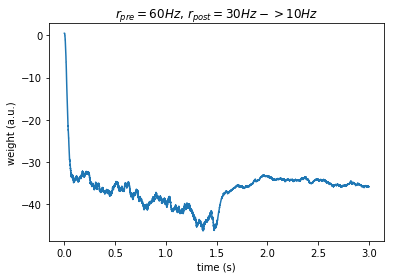

In [3]:
plt.plot(w_mon.t/second,mean(w_mon.w.T,1))
plt.xlabel('time (s)')
plt.ylabel('weight (a.u.)')
plt.title(r'$r_{pre}=%dHz$, $r_{post}=%dHz->%dHz$'%(rpre,rpost1,rpost2))
plt.show()
